In [6]:
class MeraLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b

In [7]:
import numpy as np
import pandas as pd


In [20]:
df = pd.read_csv(r"C:\Users\Komal\Downloads\placement (2).csv")

In [21]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [23]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [24]:
# df[start:stop:step_size, start:stop:step_size]
# df[0]
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [25]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [26]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [27]:
!pip install scikit-learn


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
X_train

array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
       7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
       5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
       7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
       6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
       7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
       6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
       6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
       5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
       7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
       7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
       8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
       6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
       6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.

In [30]:
y_train

array([3.13, 3.91, 2.25, 2.3 , 4.06, 3.18, 2.7 , 2.49, 3.15, 2.99, 4.08,
       4.14, 2.6 , 2.44, 2.71, 2.72, 1.63, 2.31, 2.51, 3.5 , 2.24, 2.58,
       2.42, 2.54, 4.37, 2.17, 3.14, 2.19, 3.54, 1.54, 2.72, 3.98, 2.46,
       3.  , 1.98, 2.65, 3.75, 3.67, 2.93, 3.08, 2.21, 2.84, 3.76, 3.03,
       2.09, 3.26, 2.16, 2.7 , 3.83, 2.88, 3.16, 3.04, 3.13, 3.04, 4.6 ,
       3.26, 2.85, 2.09, 3.31, 3.89, 1.87, 3.11, 2.4 , 3.48, 3.08, 2.76,
       2.93, 3.39, 2.35, 3.08, 2.14, 3.24, 1.73, 3.24, 3.44, 2.69, 3.33,
       2.42, 2.57, 3.55, 2.66, 1.53, 2.98, 2.84, 3.52, 3.16, 3.82, 2.6 ,
       1.61, 2.2 , 2.99, 3.12, 2.74, 2.83, 2.77, 2.35, 2.19, 3.42, 4.02,
       3.89, 3.15, 3.99, 3.42, 3.08, 2.46, 2.61, 3.49, 3.76, 2.82, 4.03,
       2.99, 2.73, 2.18, 3.09, 3.96, 2.1 , 3.33, 4.62, 3.47, 2.48, 4.43,
       4.11, 3.44, 3.18, 3.02, 4.06, 2.26, 1.48, 2.94, 2.89, 2.72, 3.09,
       2.73, 4.36, 3.  , 3.79, 2.59, 2.87, 3.57, 1.37, 3.6 , 2.43, 3.33,
       2.31, 3.4 , 3.89, 4.25, 3.26, 3.67, 2.79, 3.

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
# reshape(row,col)

In [34]:
lr.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [35]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [36]:
lr.predict(X_test.reshape(-1,1))

array([[3.89111601],
       [3.09324469],
       [2.38464568],
       [2.57434935],
       [1.6537286 ],
       [1.77647803],
       [2.07219258],
       [2.93143862],
       [3.76278706],
       [2.93701814],
       [4.09197872],
       [3.51170867],
       [2.97049525],
       [2.40138424],
       [3.18809652],
       [3.46707251],
       [1.94386362],
       [3.24389172],
       [2.97607477],
       [3.41685683],
       [2.55761079],
       [3.16577844],
       [2.85890486],
       [3.12114229],
       [3.68467378],
       [2.8700639 ],
       [3.49497011],
       [3.34432308],
       [3.91901361],
       [1.96060218],
       [3.65119666],
       [3.2104146 ],
       [3.74046898],
       [2.7863711 ],
       [2.78079158],
       [3.27178932],
       [3.52844723],
       [2.61340599],
       [2.65804215],
       [2.71383735]])

In [37]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [38]:
m = lr.coef_

In [39]:
lr.intercept_

array([-0.89611192])

In [40]:
# lr.get_params

In [41]:
import matplotlib.pyplot as plt

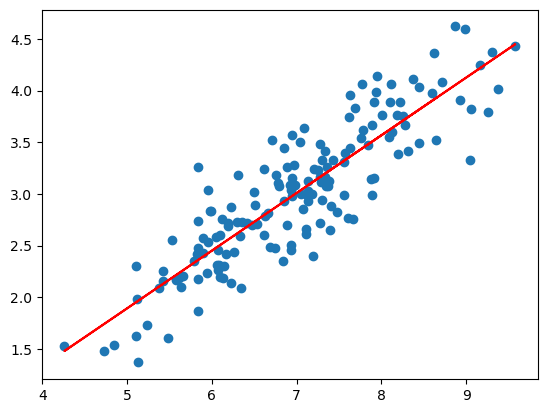

In [42]:
plt.scatter(x = X_train,y = y_train)
plt.plot( X_train ,  lr.predict(X_train.reshape(-1,1)),color ='red')
plt.show()

In [43]:
X_train.reshape(1,-1)

array([[7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
        7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
        5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
        7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
        6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
        7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
        6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
        6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
        5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
        7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
        7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
        8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
        6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
        6.06, 7.57, 8.1 , 9.16, 5.84, 

In [44]:
lr = MeraLR()

In [45]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [46]:
X_train.shape[0]

160

In [47]:
X_train[0]

np.float64(7.14)

In [48]:
X_train.mean()

np.float64(6.989937500000001)

In [49]:
X_test[0]

np.float64(8.58)

In [50]:
print(lr.predict(X_test[0]))

8.58
3.891116009744203
